In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import geopandas as gpd

#TODO: install geopandas onto conda environment

In [182]:
prediction_df = pd.read_csv("../data/model_training_data/site_specific_ripeness_sci_names.csv", index_col=0)

prediction_df = prediction_df[prediction_df['species'] != 'Ehretia']

prediction_df['lon_180'] = np.mod(prediction_df['longitude'] + 180, 360) - 180

In [183]:
prediction_df

,species,formatted_sci_name,latitude,longitude,site_id,flowering_day,lon_180
0,Rubus,Rubus occidentalis,42,268,0,214,-92
7,Rubus,Rubus occidentalis,43,286,1,183,-74
143,Rubus,Rubus occidentalis,43,279,2,183,-81
149,Rubus,Rubus idaeus,43,279,2,183,-81
152,Rubus,Rubus occidentalis,45,267,3,214,-93
...,...,...,...,...,...,...,...
3770,Olea,Olea europaea,-35,149,94,214,149
3815,Olea,Olea europaea,-35,143,96,214,143
3817,Olea,Olea europaea,-35,139,97,214,139
3829,Olea,Olea europaea,36,239,98,214,-121


In [184]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1771207407.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/576183850.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


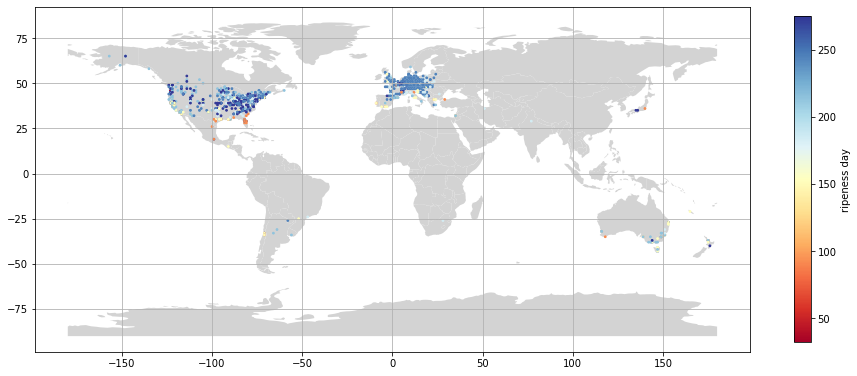

In [185]:
# initialize an axis
fig, ax = plt.subplots(figsize=(16,12))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey", ax=ax)

# plot points


plt.scatter(mean_predictions['lon_180'],
        mean_predictions['latitude'],
        c=mean_predictions['flowering_day'], cmap='RdYlBu', s=3)

plt.colorbar(shrink=0.5, label='ripeness day')
# add grid
ax.grid()
plt.show()

In [196]:
## Species-specific function

def plot_ripeness_america(name, name_type="genus"):
    # initialize an axis
    fig, ax = plt.subplots(figsize=(16,12))
    # plot map on axis
    countries = gpd.read_file(  
         gpd.datasets.get_path("naturalearth_lowres"))

    countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)

    # plot points
    
    if name == 'all':
        species_df = prediction_df
    else:
        if name_type == "genus":
            species_df = prediction_df[prediction_df['species'] == name]
        elif name_type == "species":
            species_df = prediction_df[prediction_df['formatted_sci_name'] == name]
    
    plt.scatter(species_df['lon_180'],
            species_df['latitude'],
            c=species_df['flowering_day'], 
                cmap='viridis', s=175, marker='h')

    plt.colorbar(shrink=0.5, label='mean ripeness day (all species)')

    # shrink to america
    plt.xlim(-130, -65)
    plt.ylim(25, 50)
    
    if name == 'all':
        name = 'All Species'
    
    plt.title("{} Average Ripeness in America".format(name), size=18)
    
    plt.clim(np.min(prediction_df['flowering_day']), np.max(prediction_df['flowering_day']))

    # add grid
    ax.grid()
    plt.show()

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


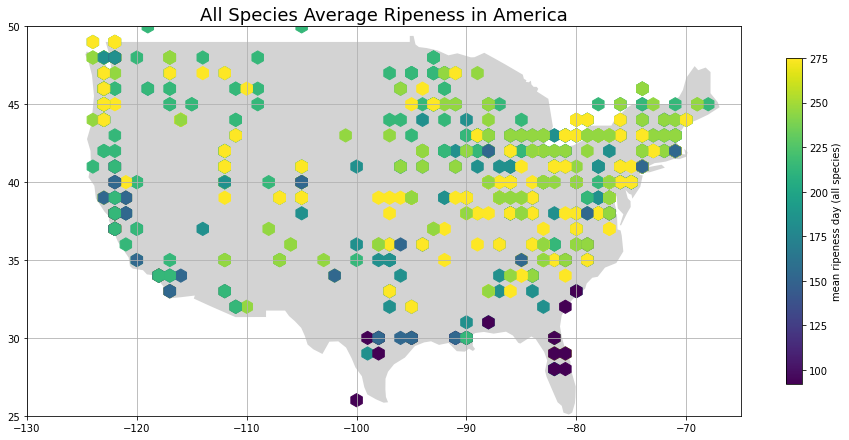

In [197]:
plot_ripeness_america('all')

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


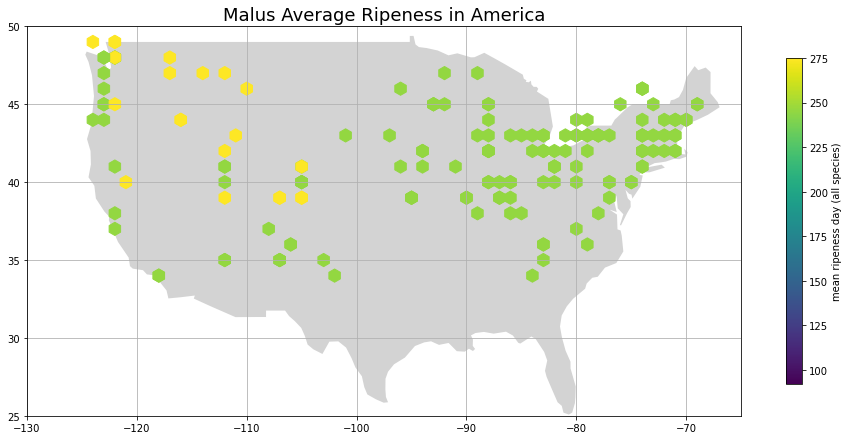

In [198]:
plot_ripeness_america('Malus')

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


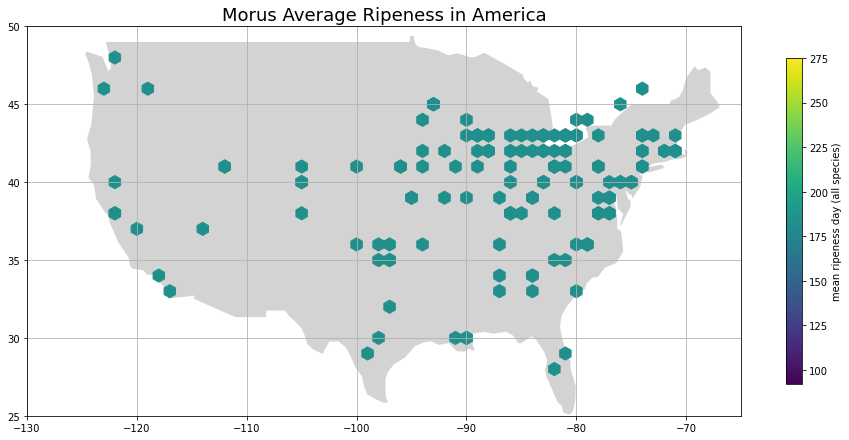

In [199]:
plot_ripeness_america('Morus')

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


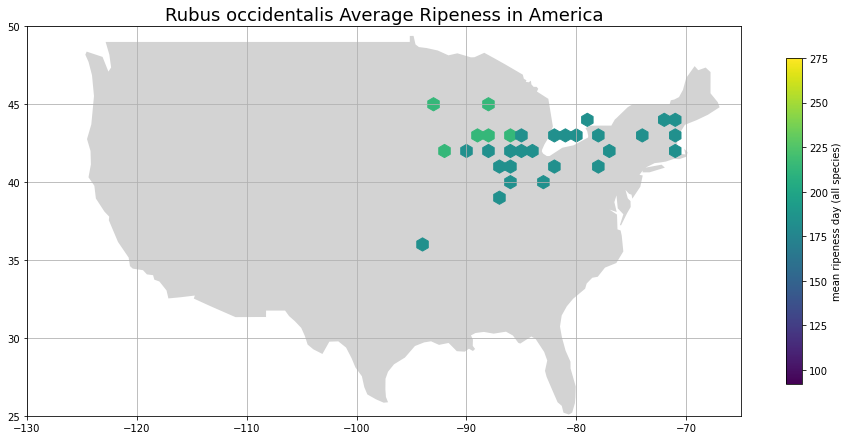

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


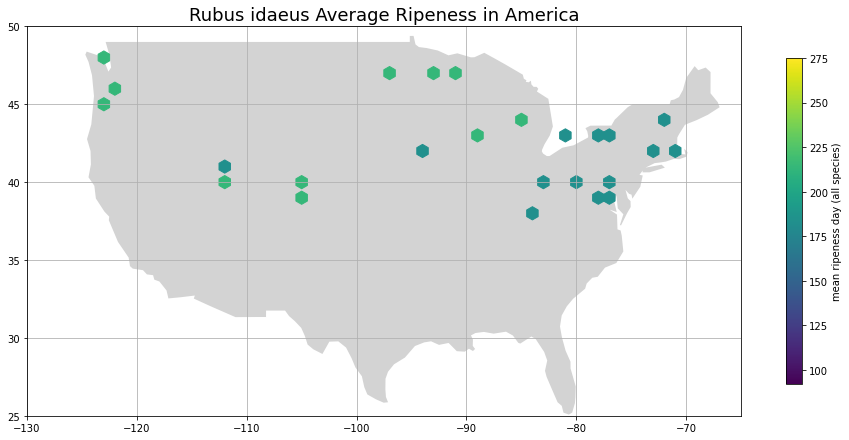

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


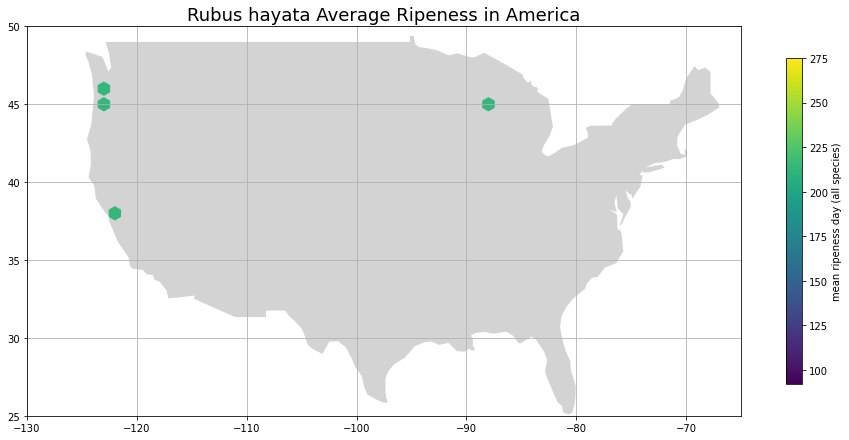

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


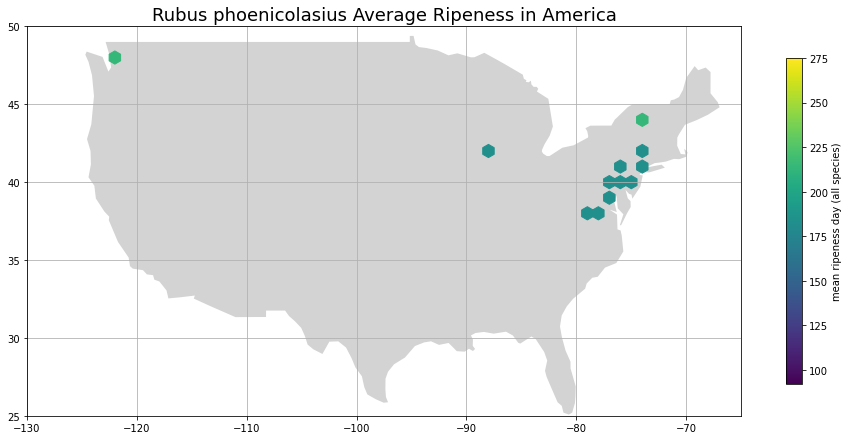

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


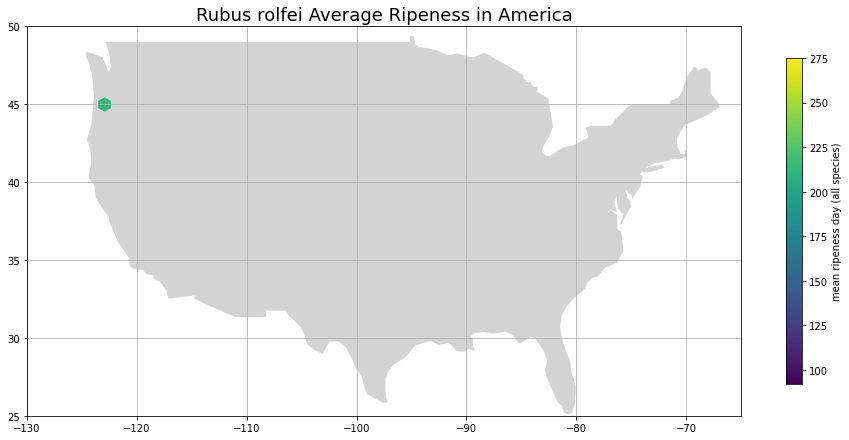

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


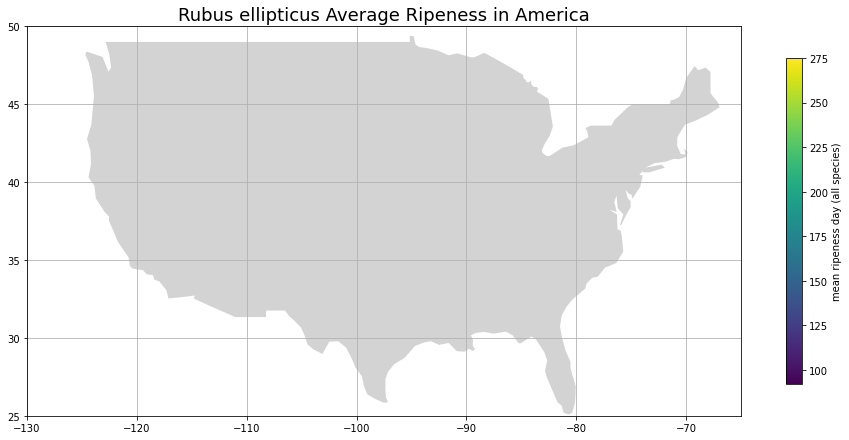

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


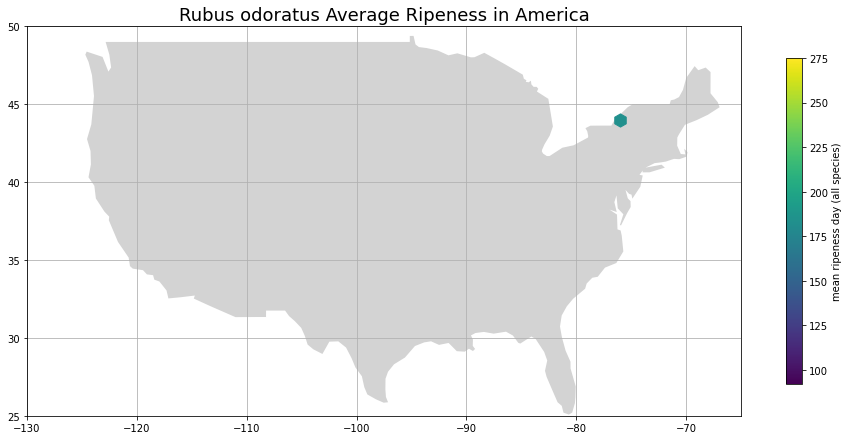

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


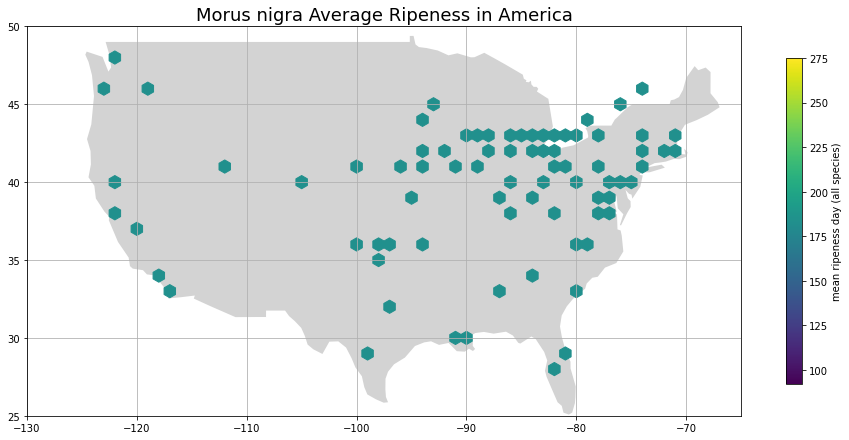

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


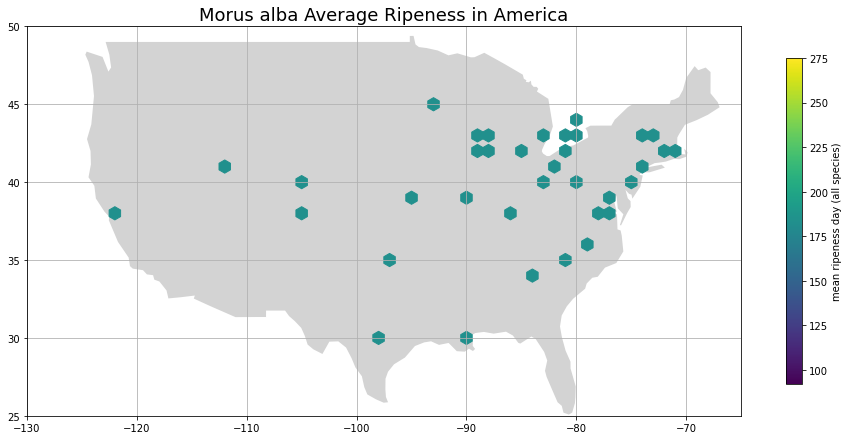

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


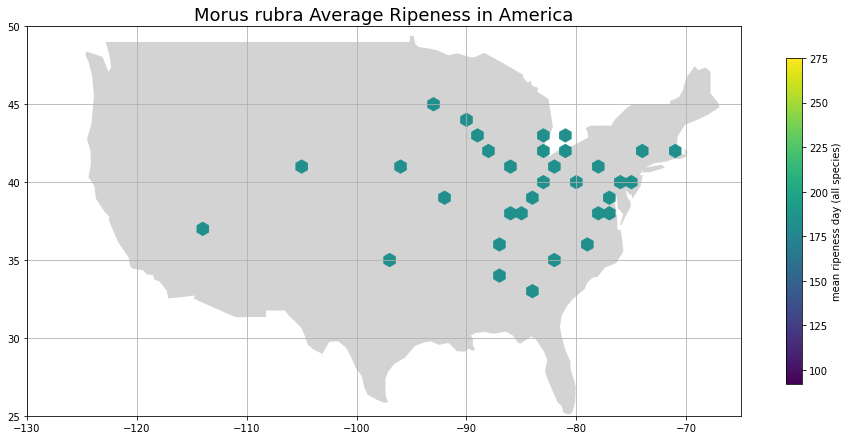

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


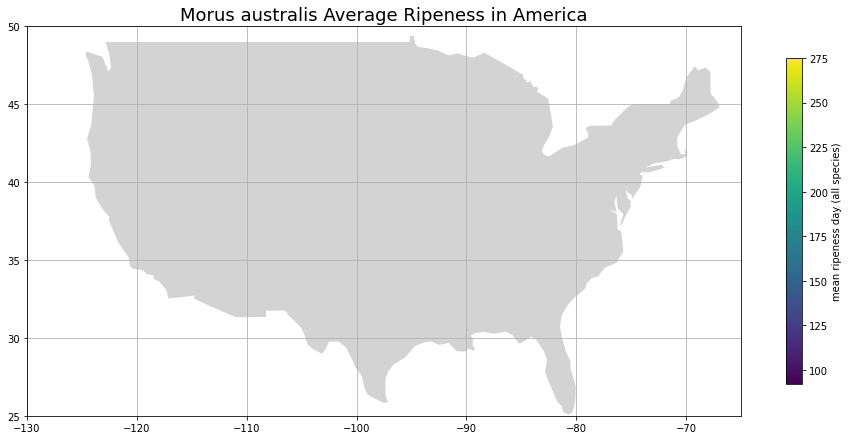

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


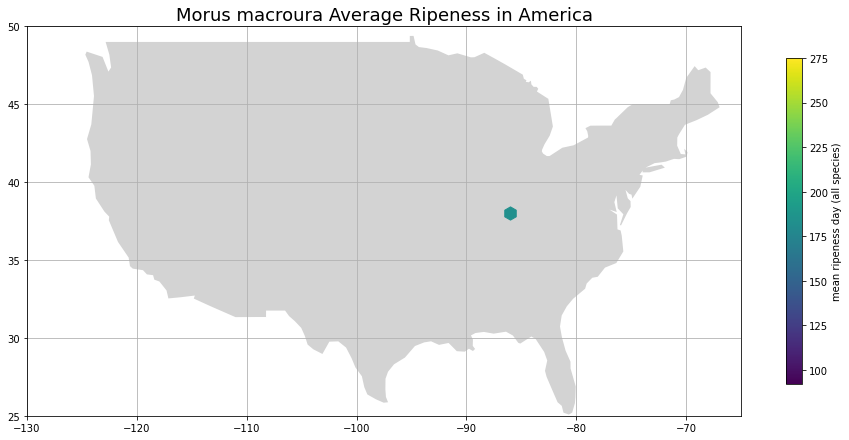

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


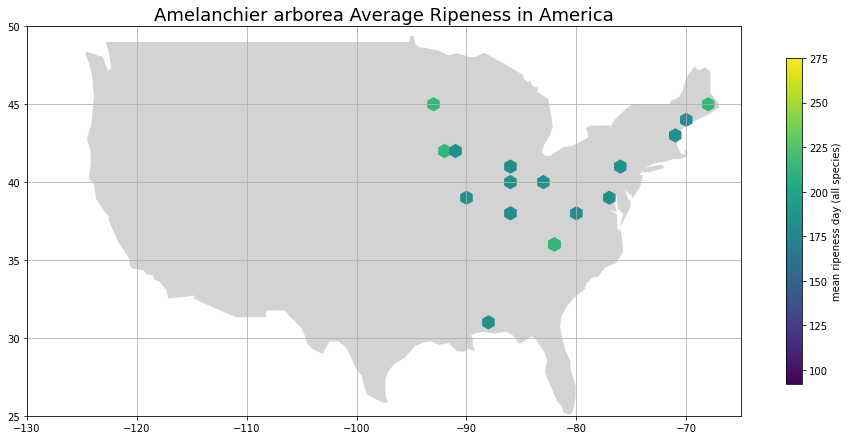

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


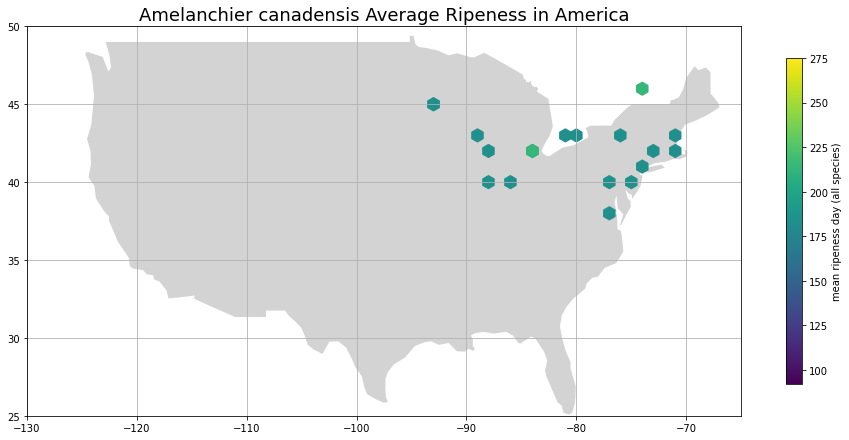

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


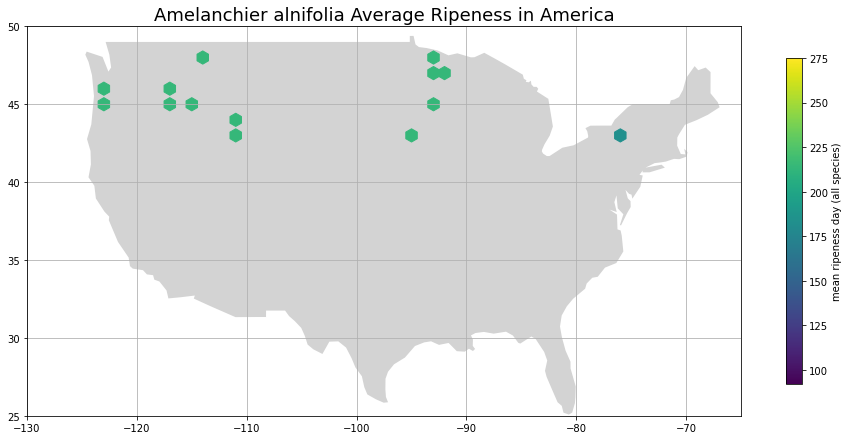

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


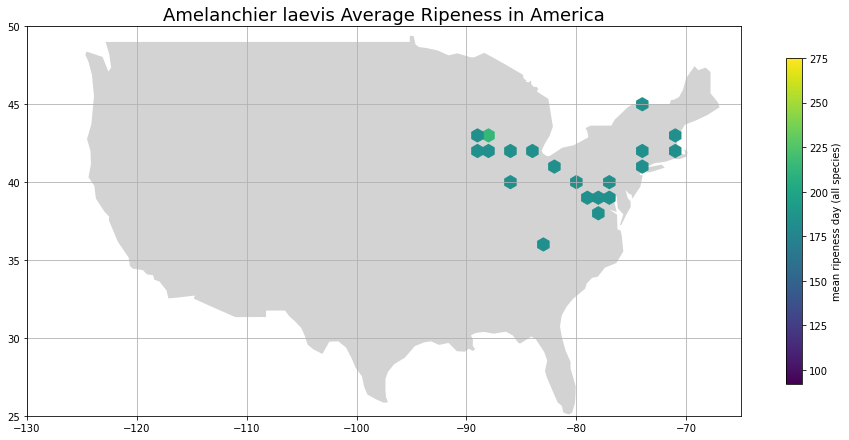

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


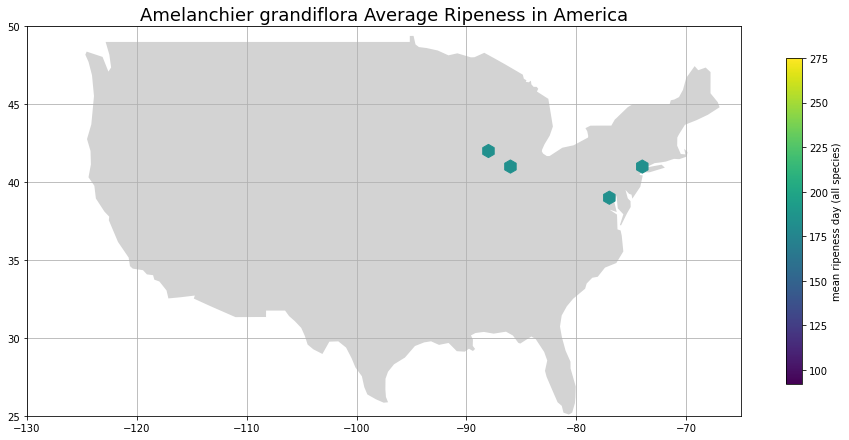

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


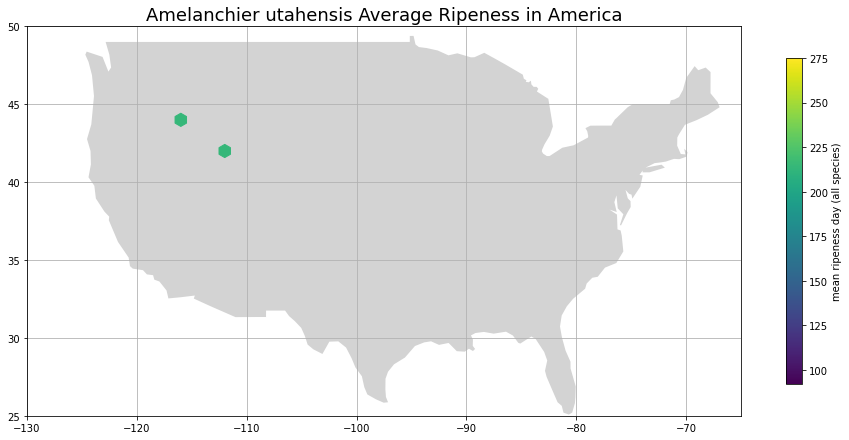

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


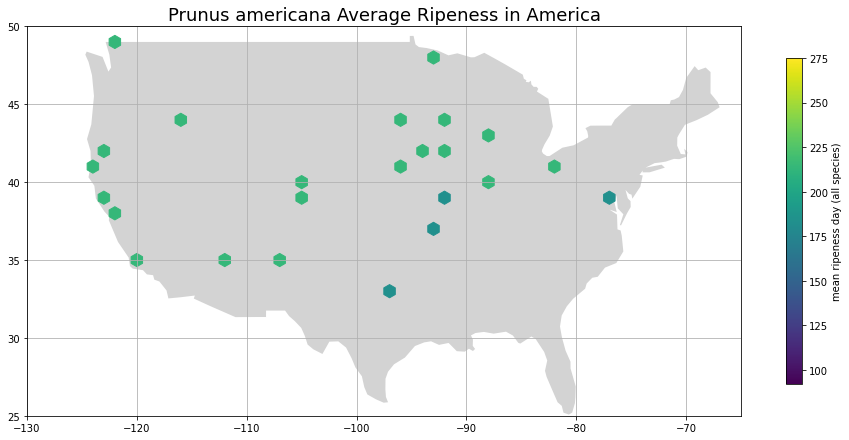

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


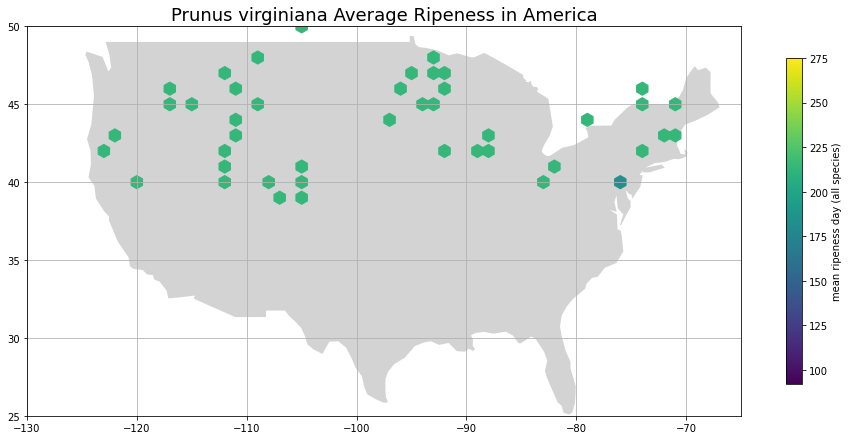

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


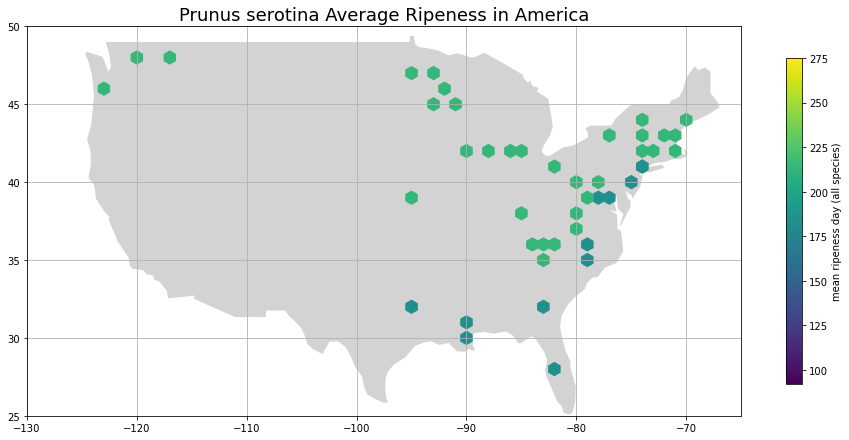

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


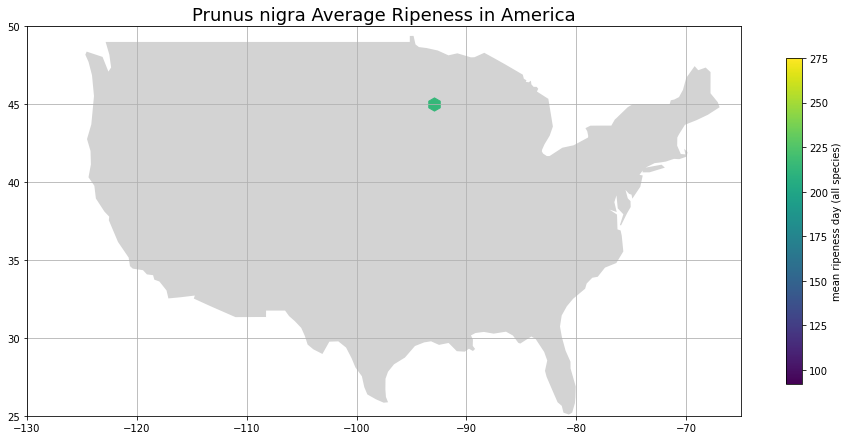

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


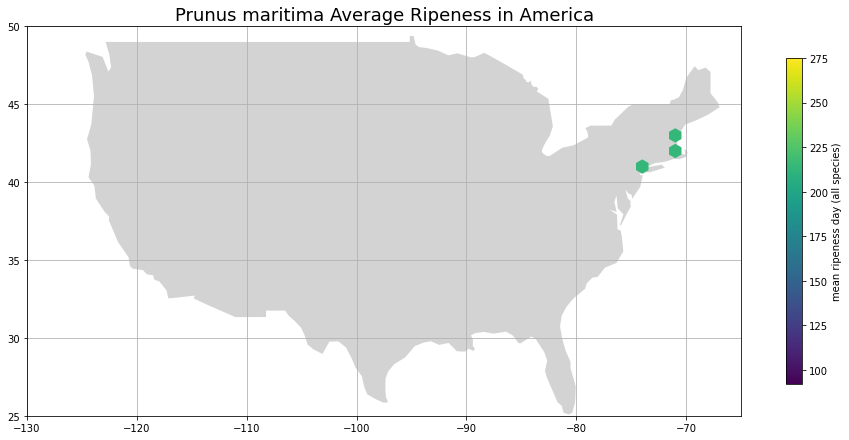

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


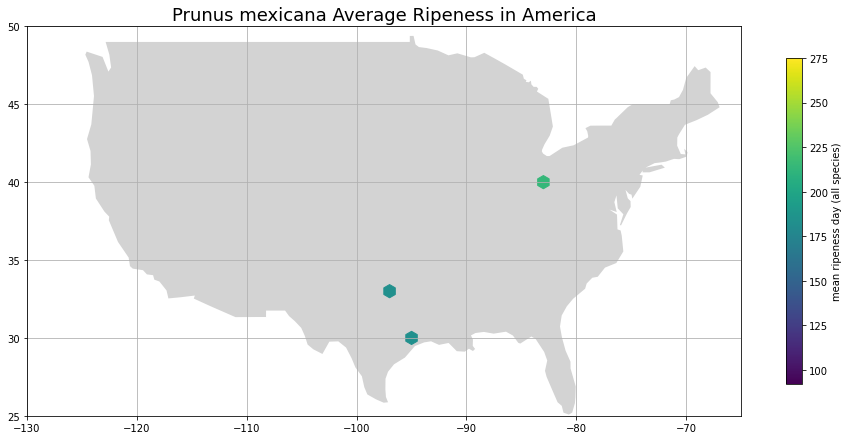

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


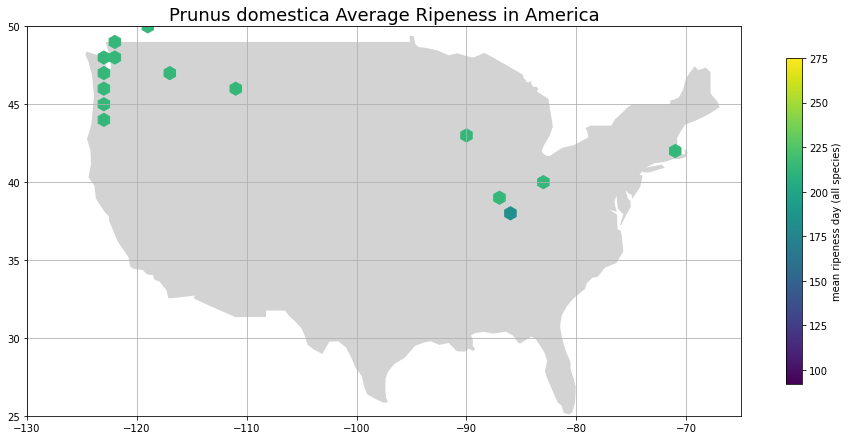

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


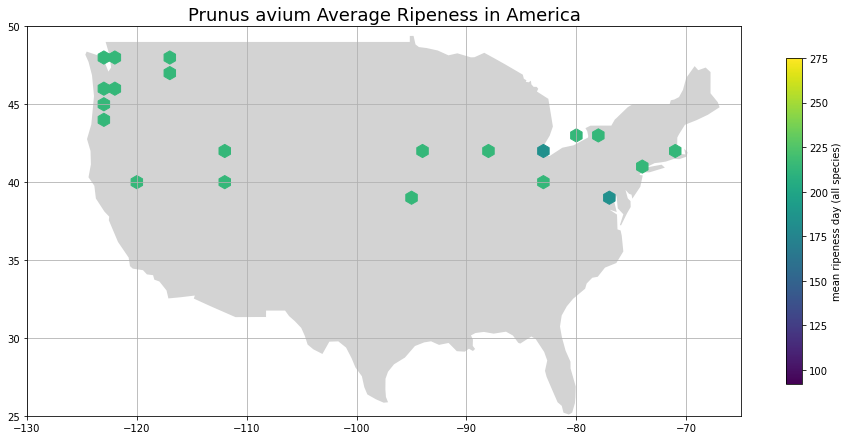

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


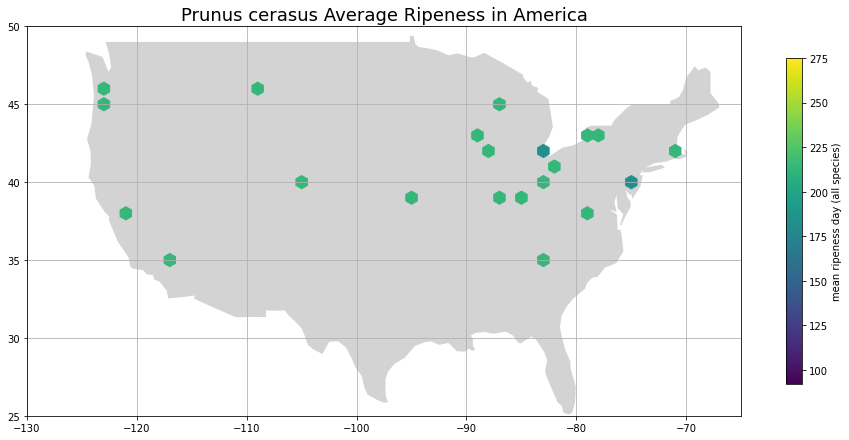

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


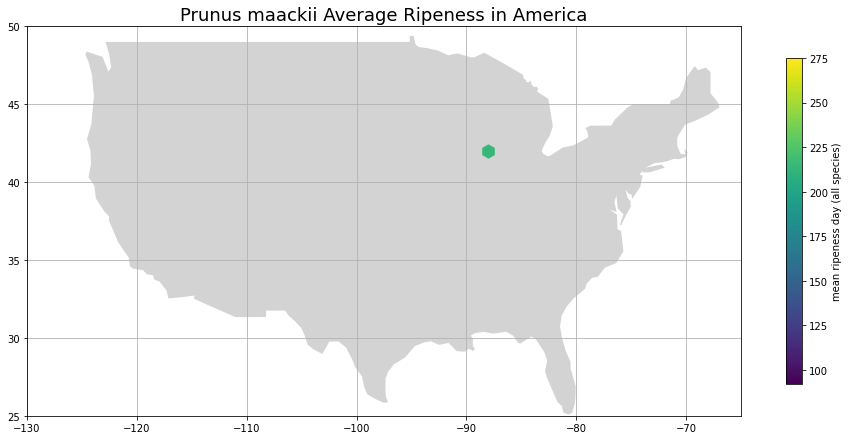

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


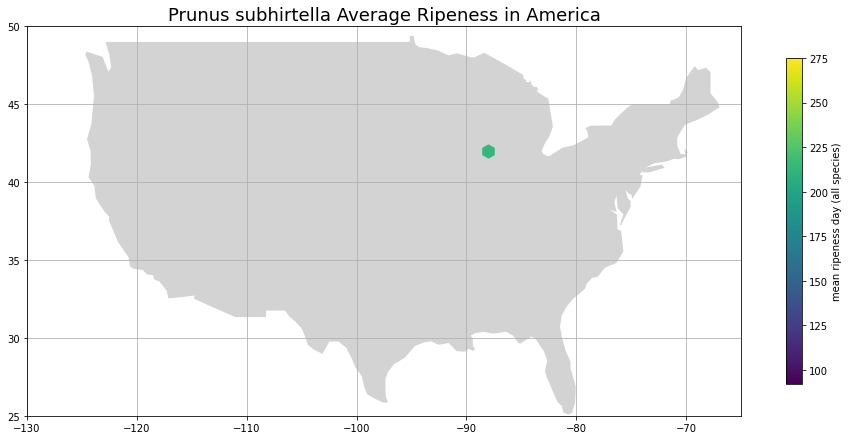

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


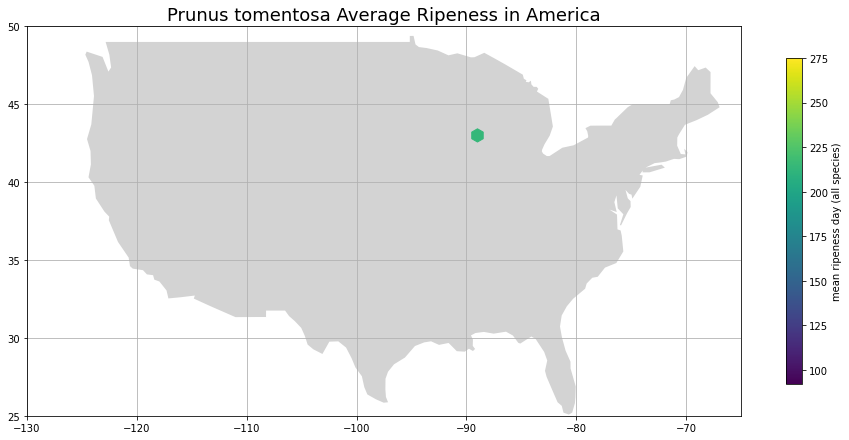

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


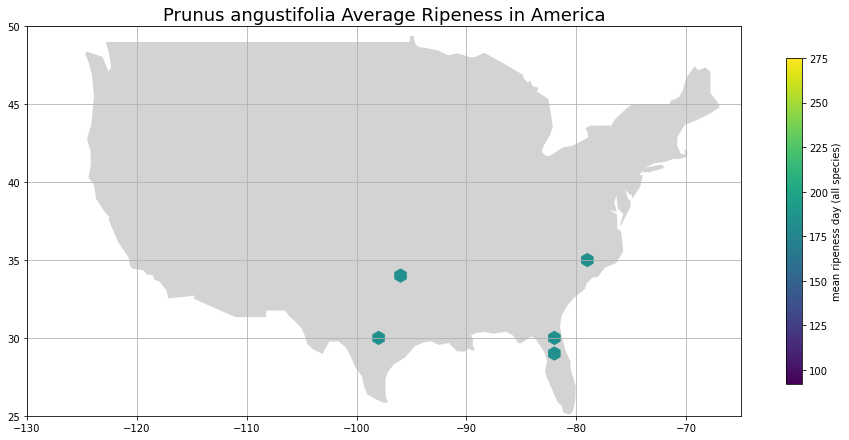

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


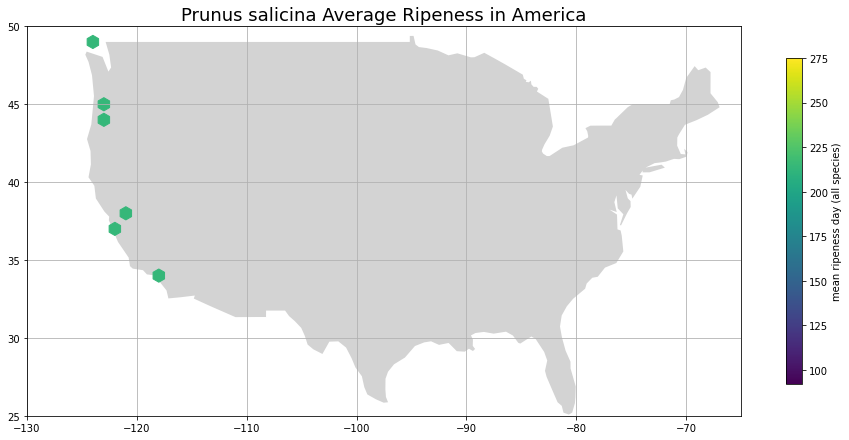

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


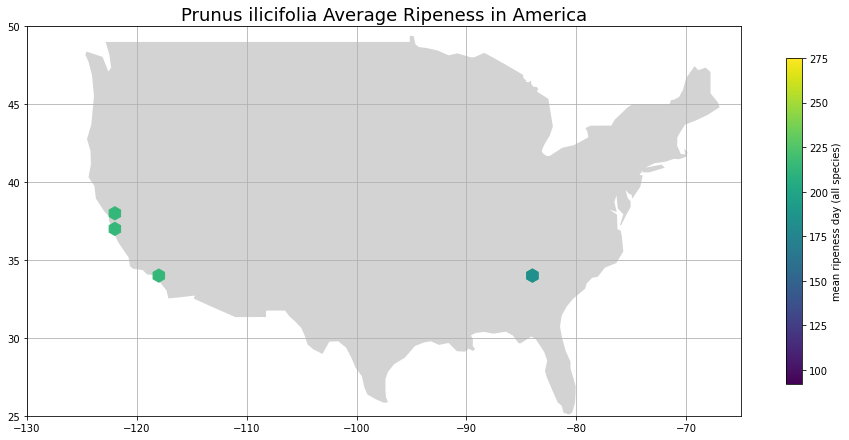

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


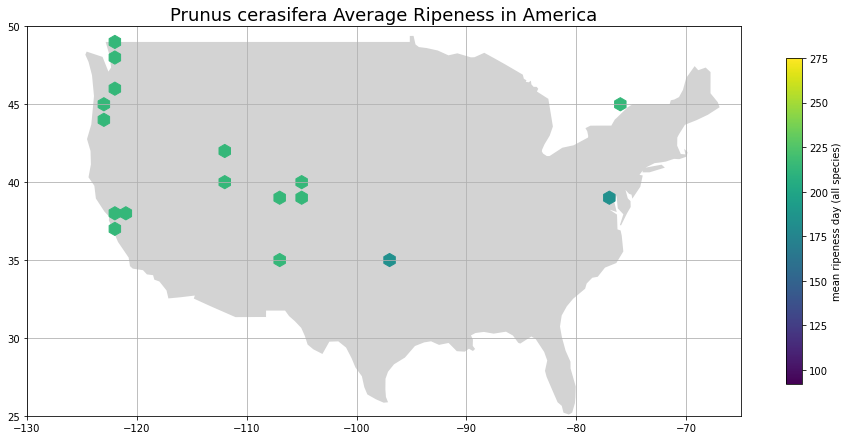

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


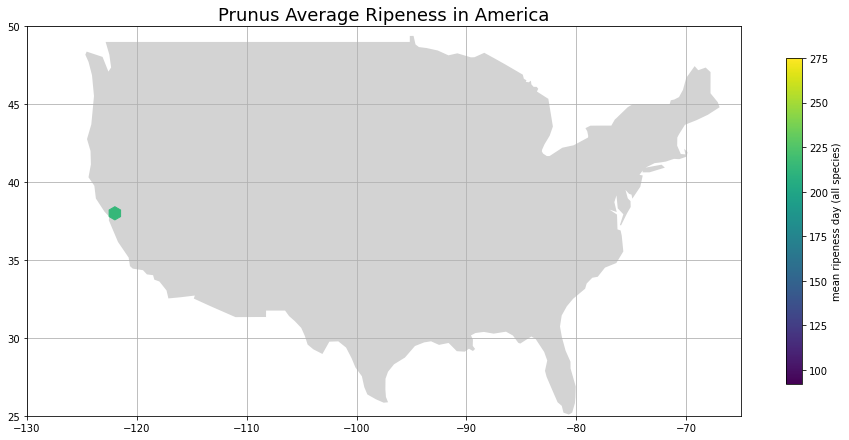

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


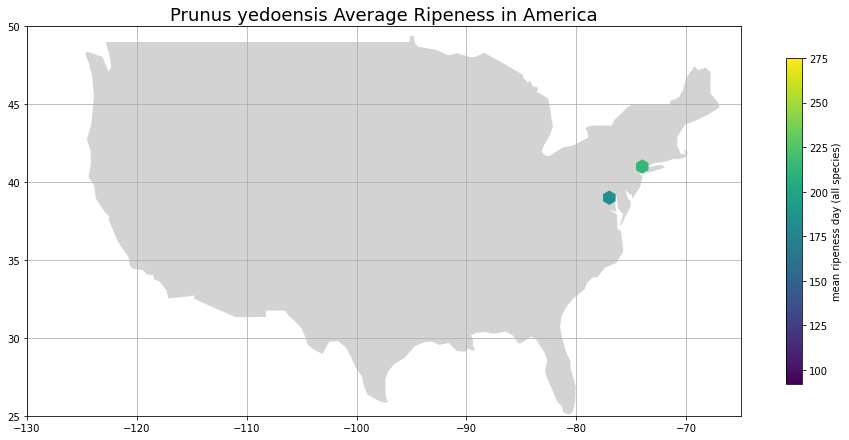

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


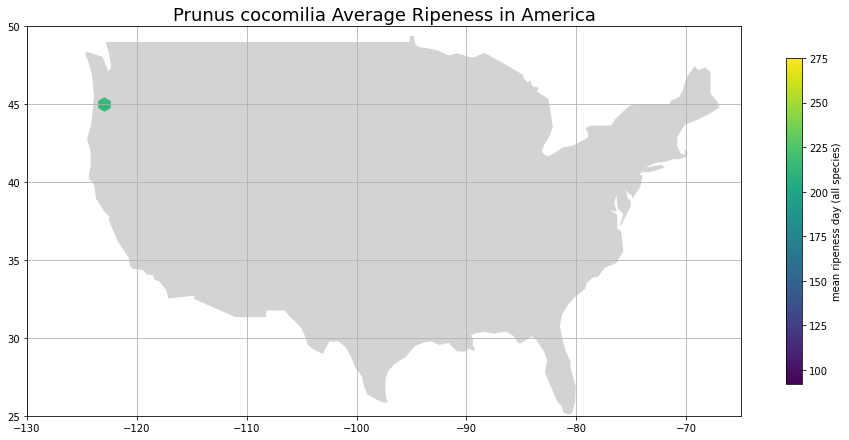

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


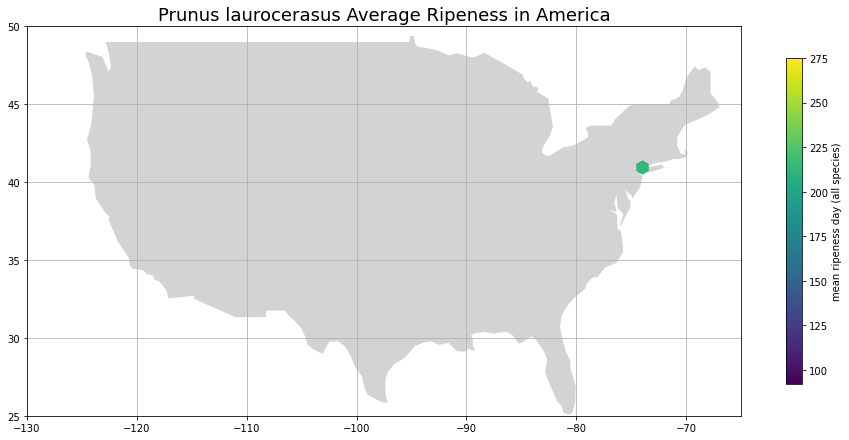

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


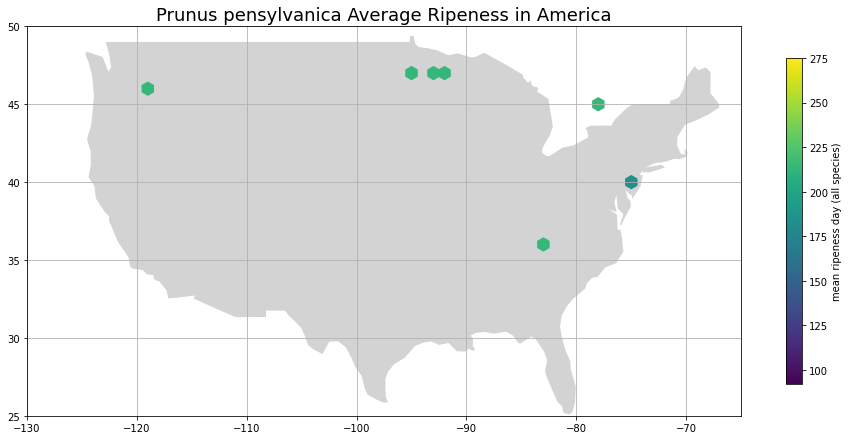

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


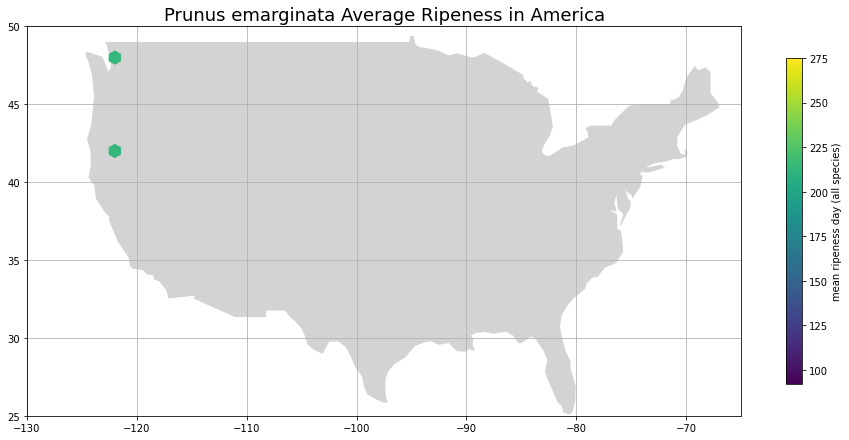

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


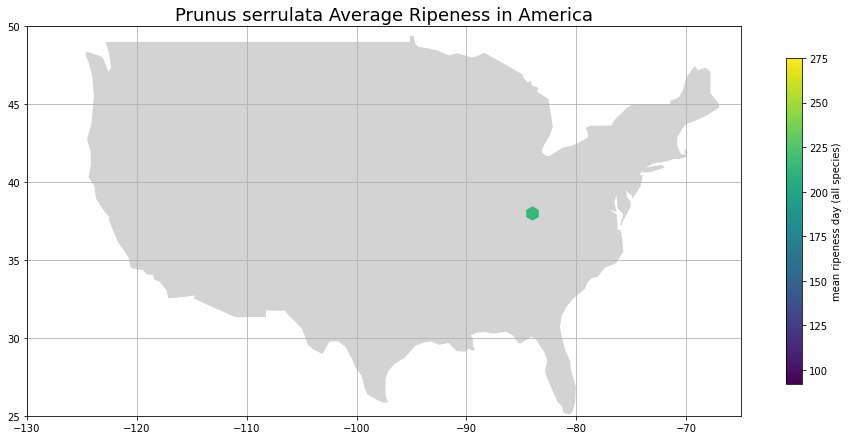

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


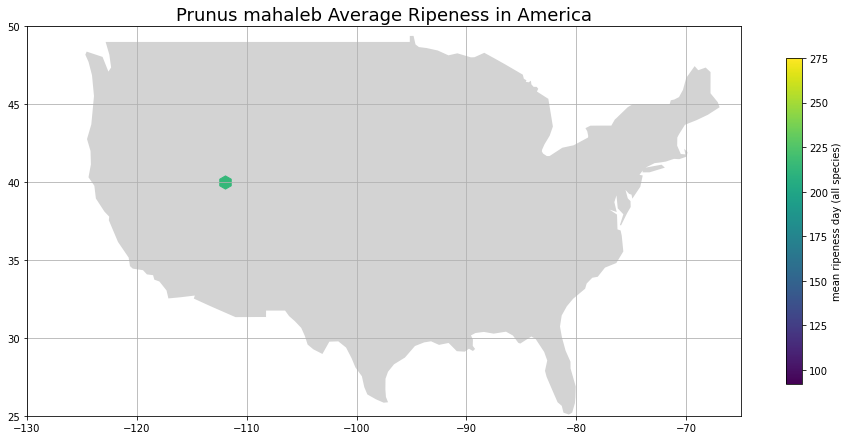

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


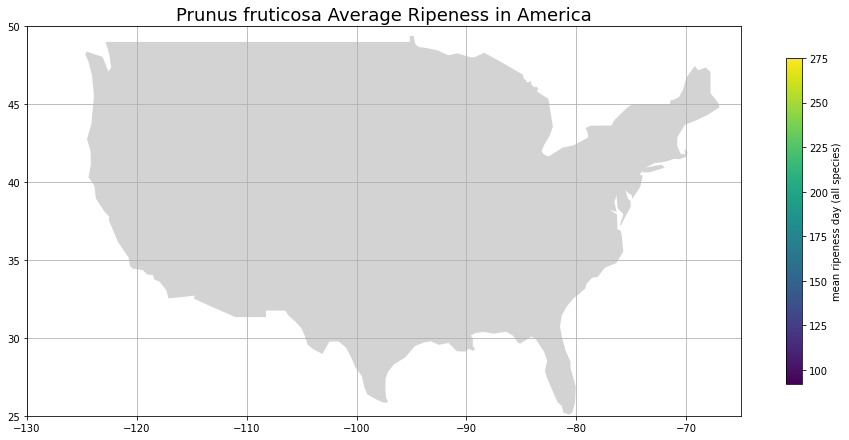

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


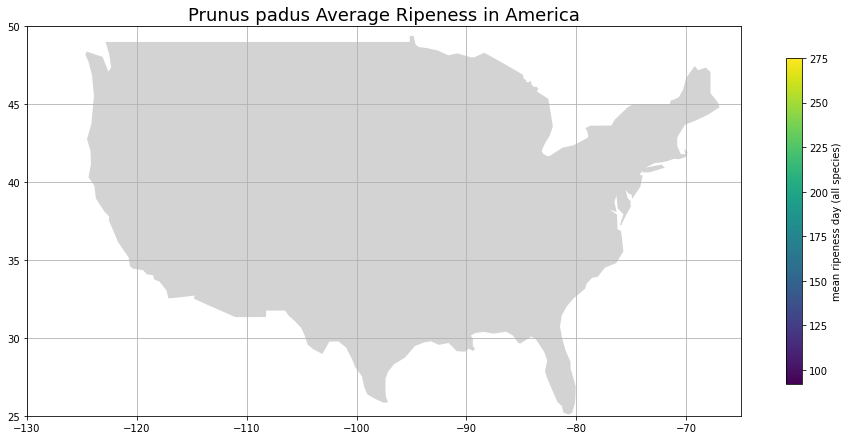

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


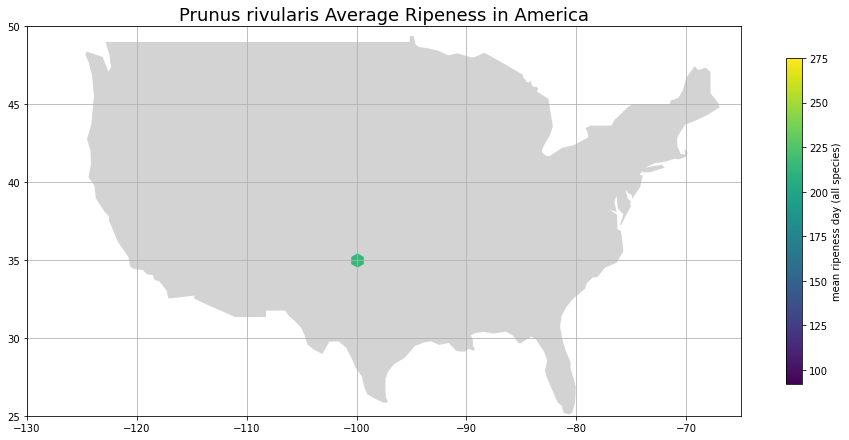

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


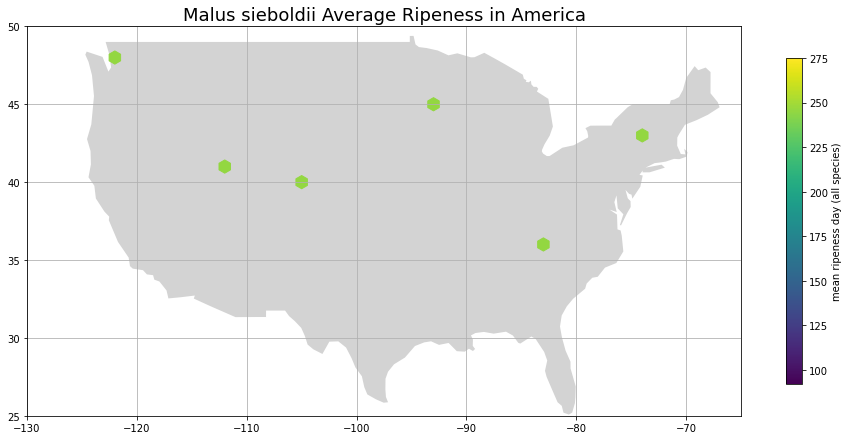

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


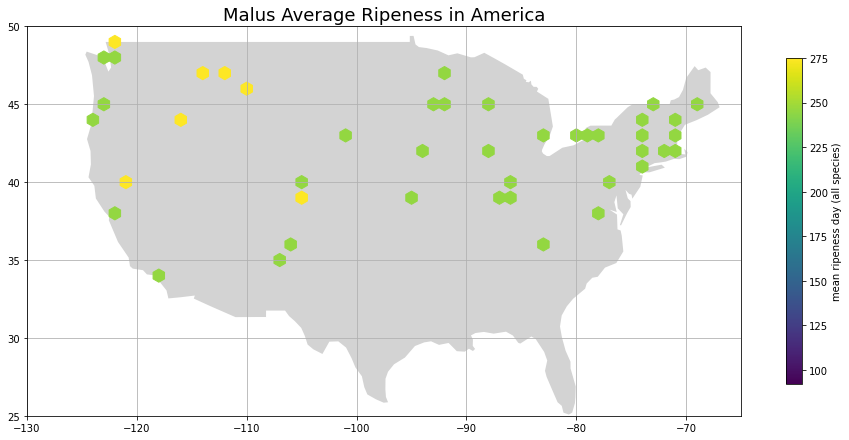

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


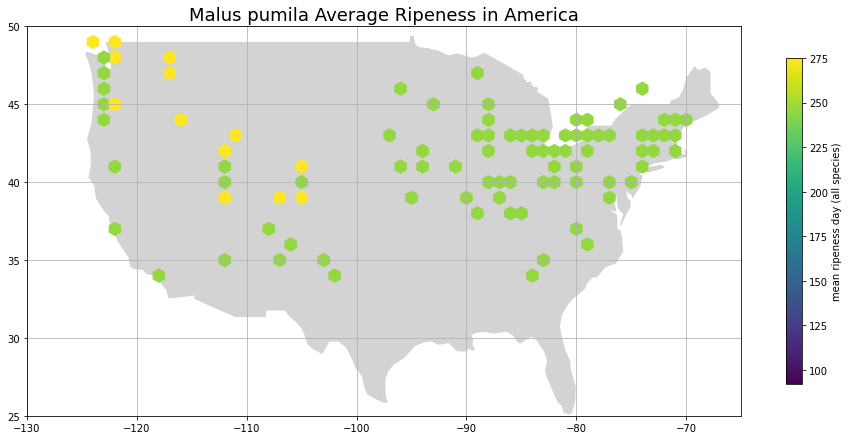

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


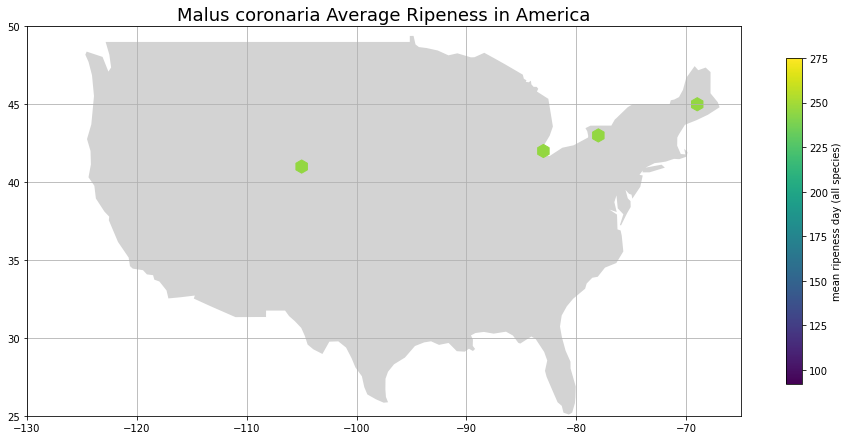

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


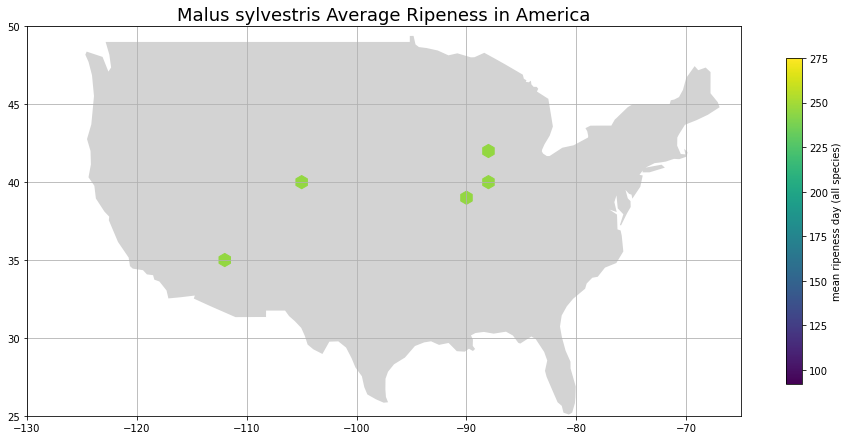

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


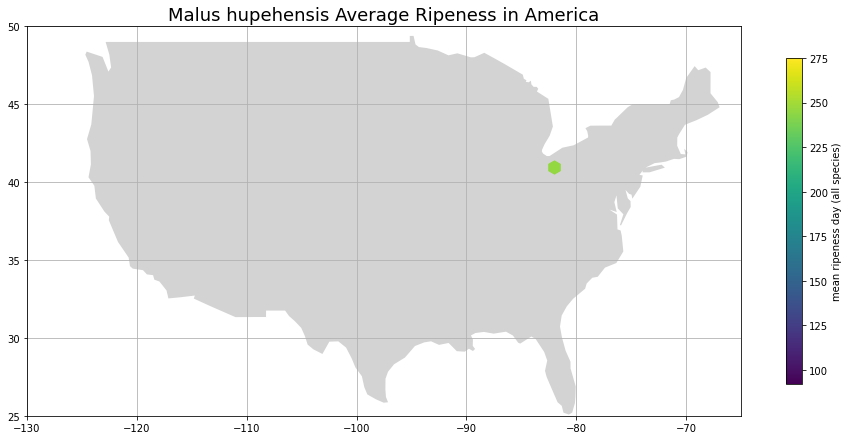

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


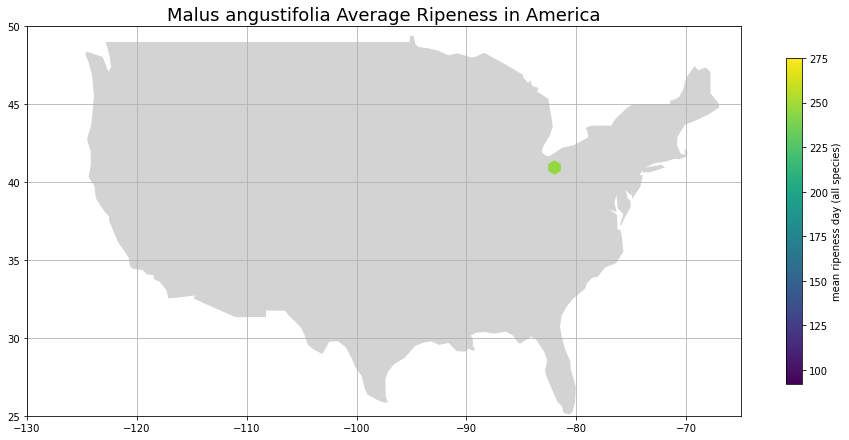

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


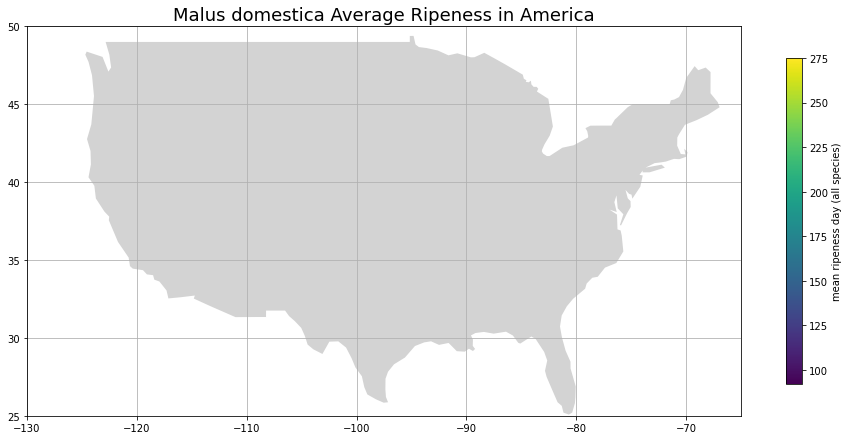

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


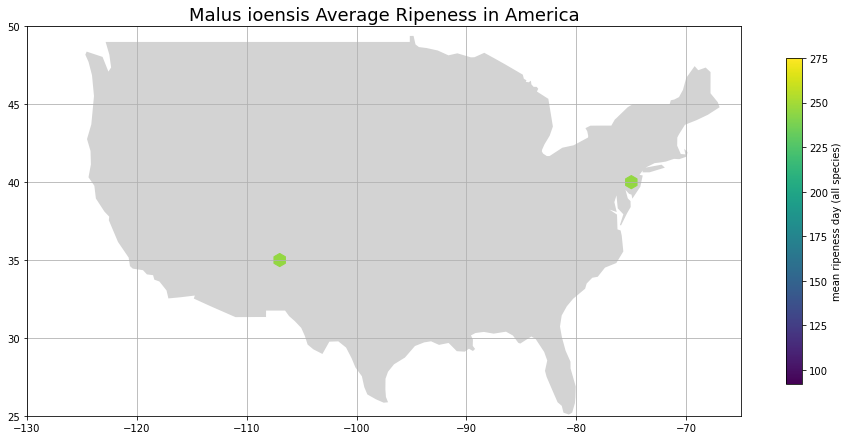

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


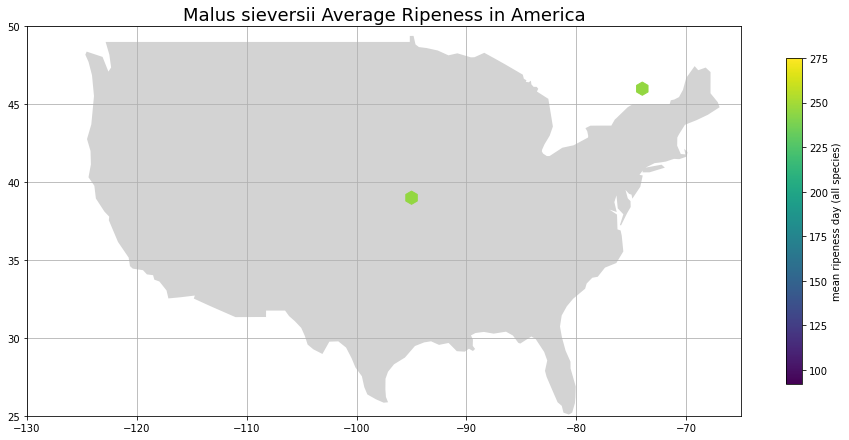

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


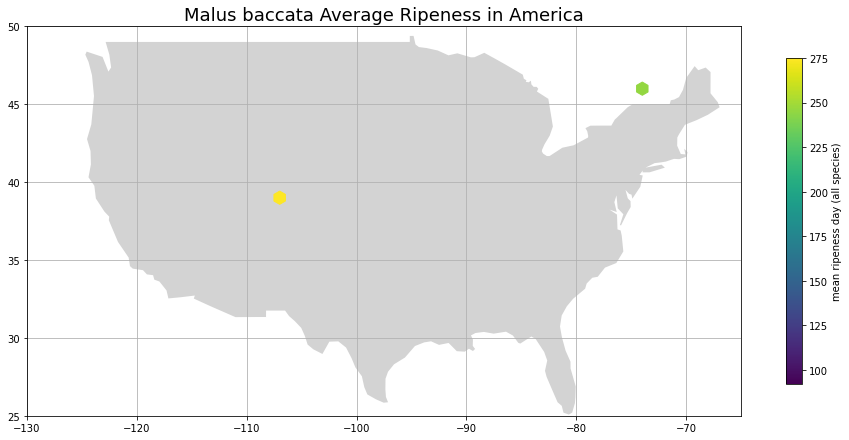

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


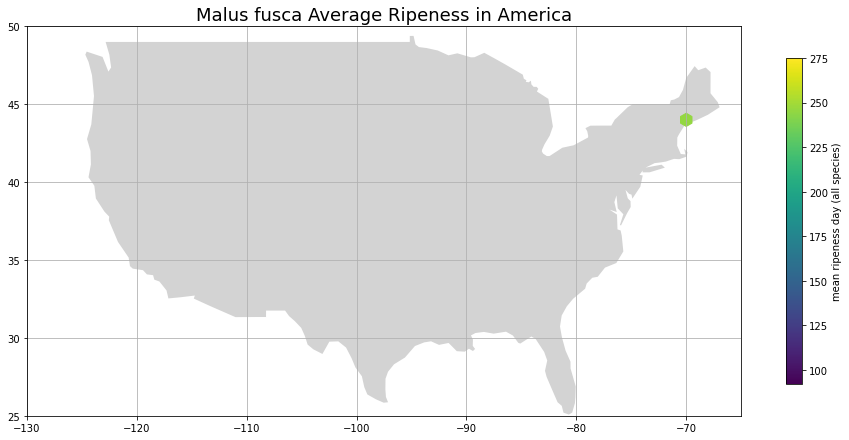

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


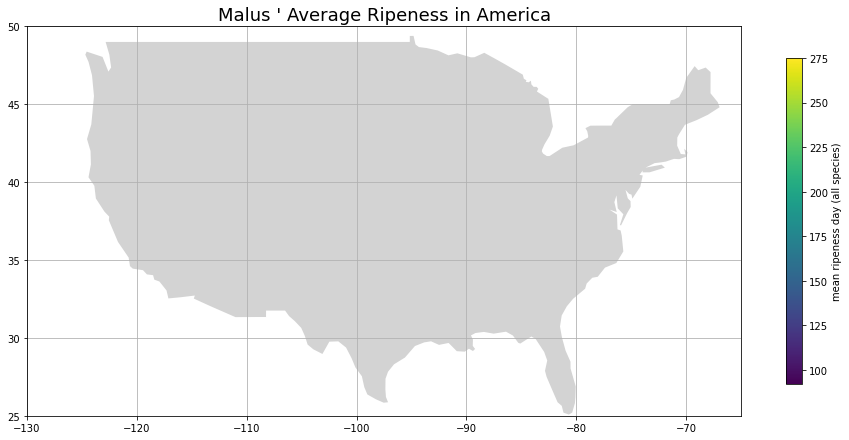

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


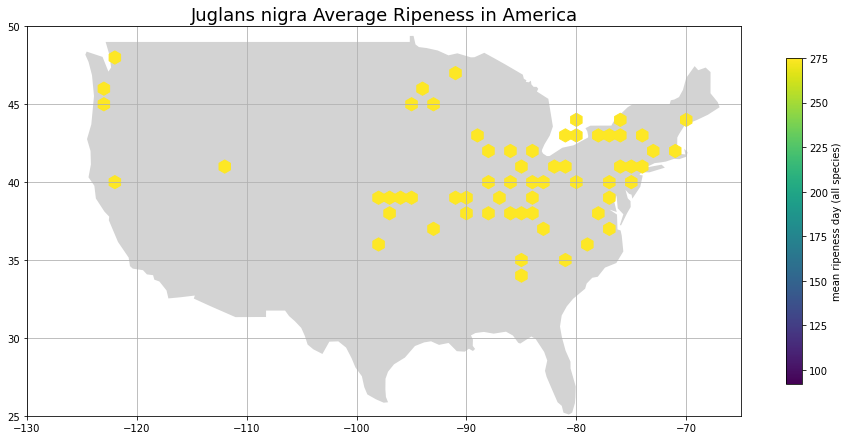

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


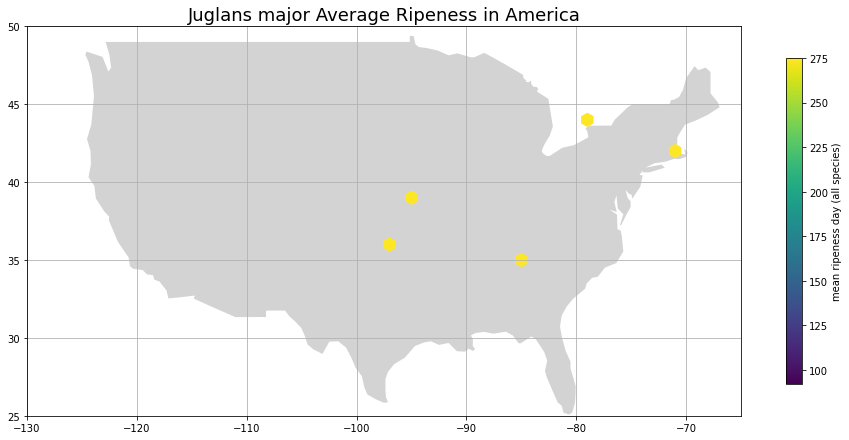

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


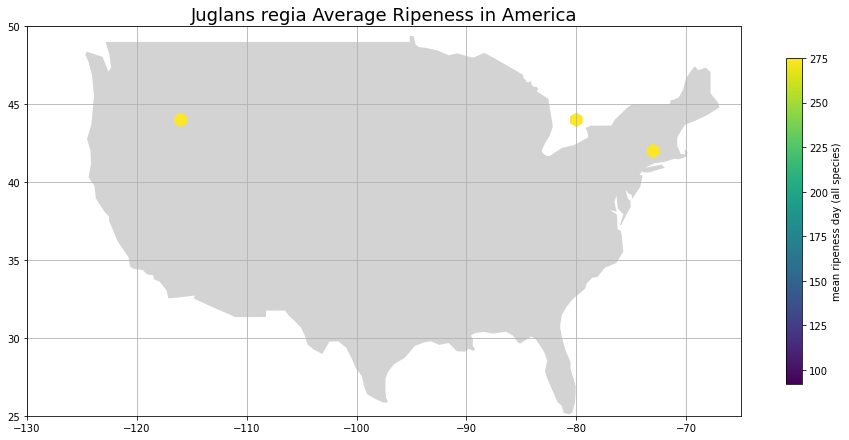

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


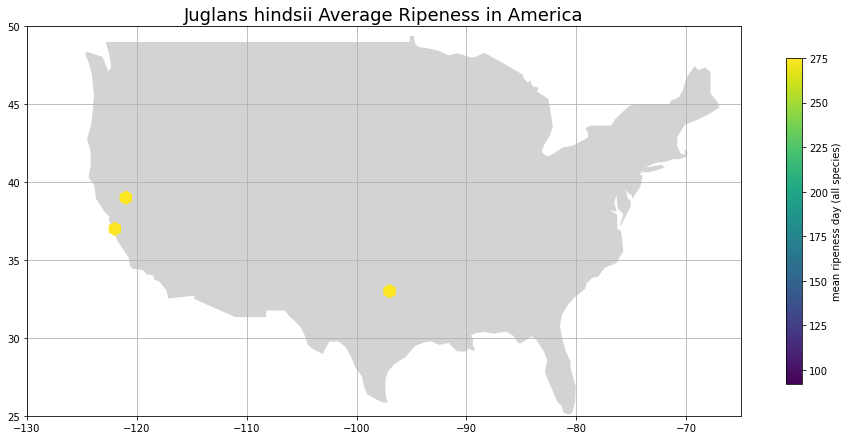

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


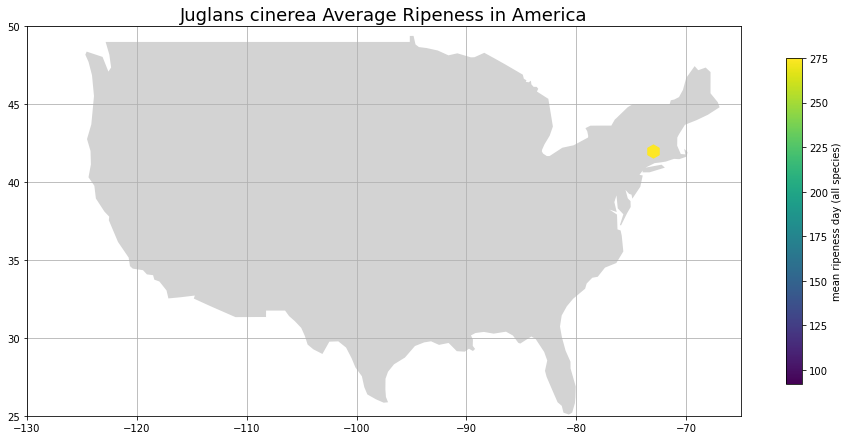

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


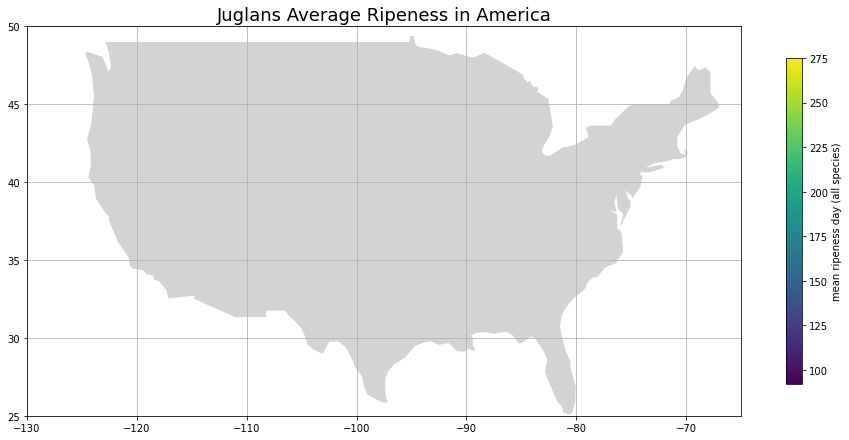

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


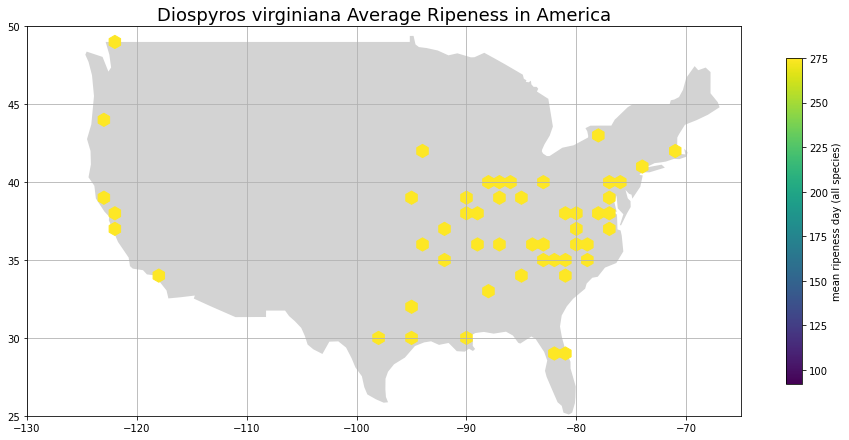

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


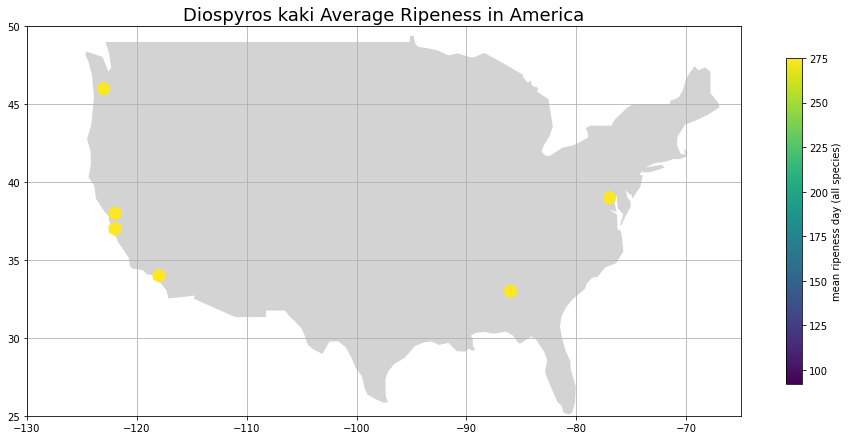

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


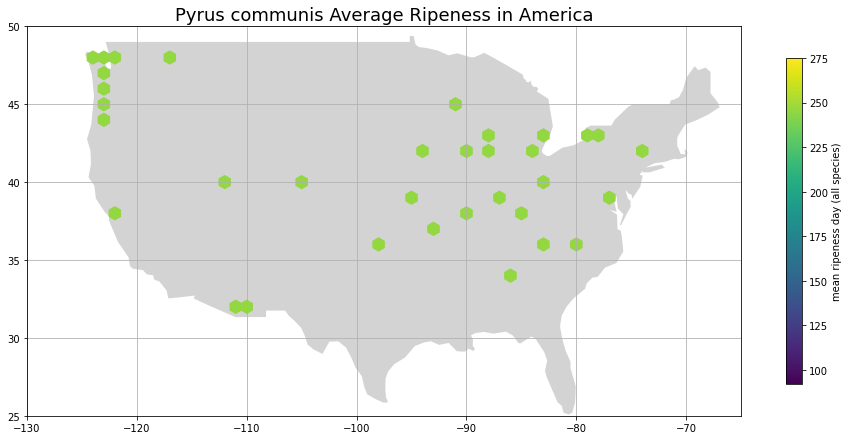

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


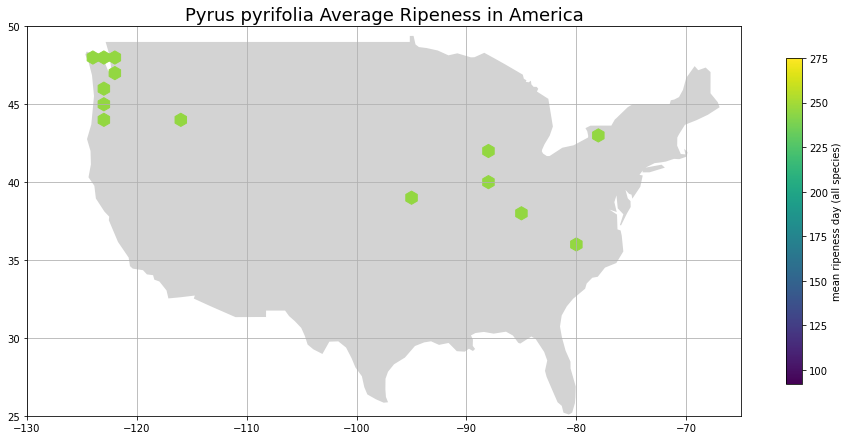

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


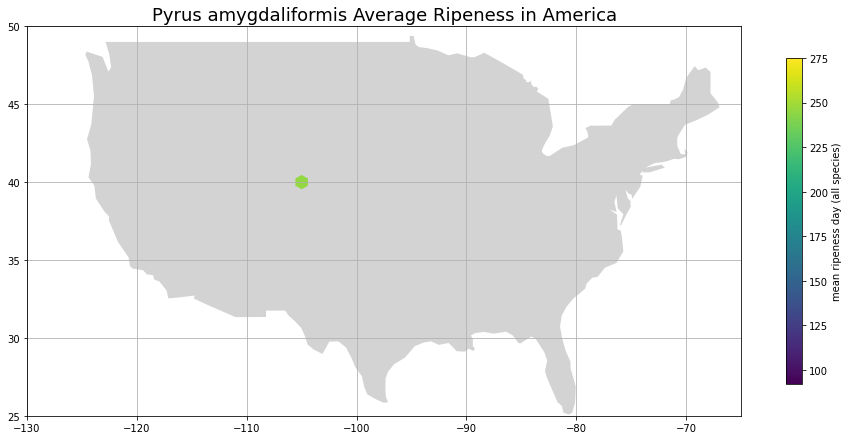

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


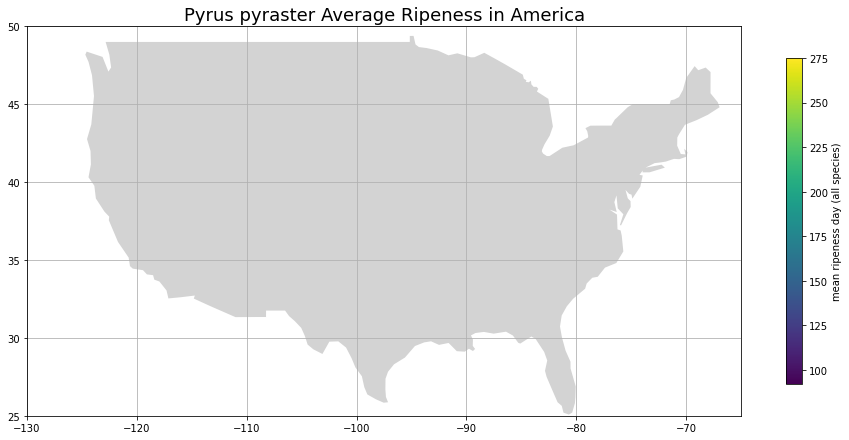

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


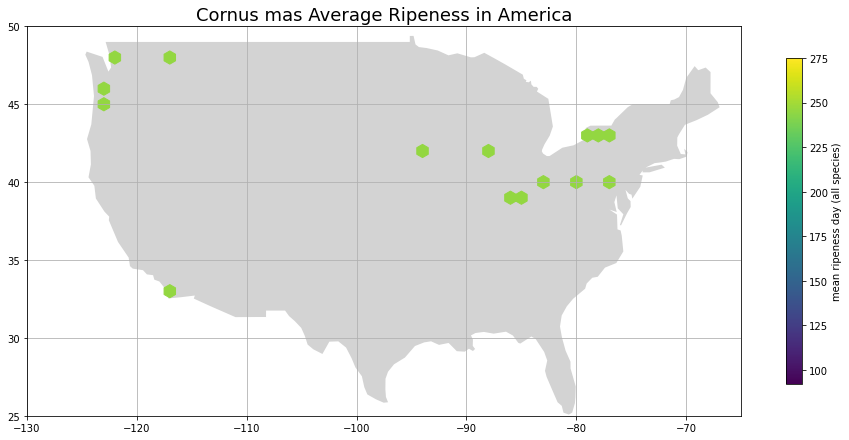

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


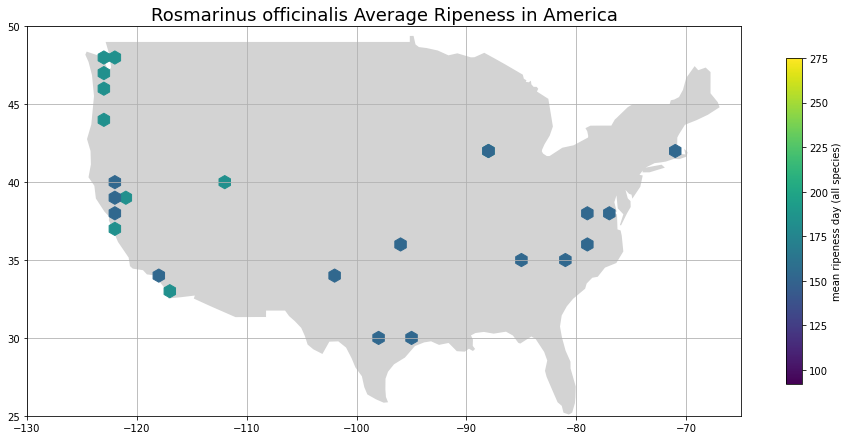

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


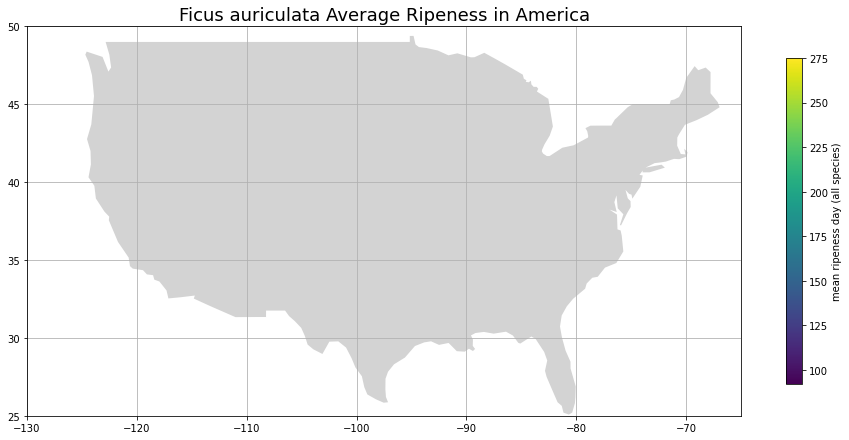

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


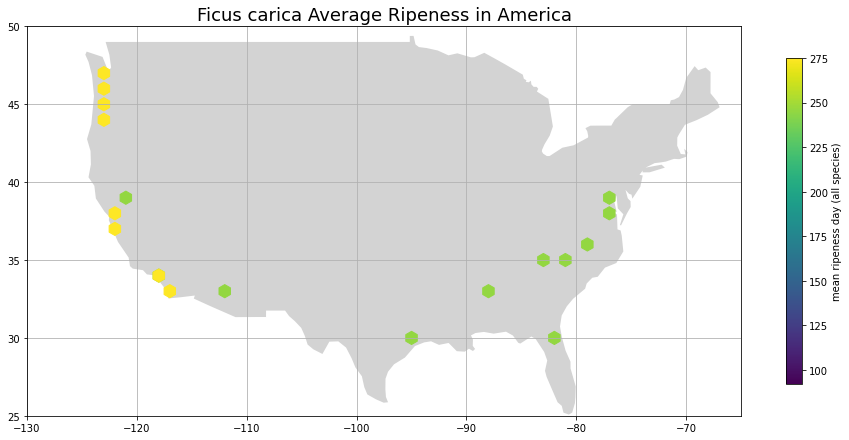

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


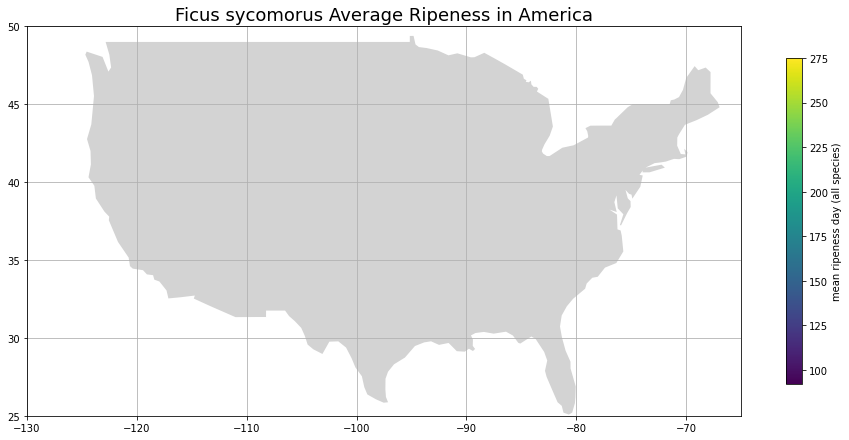

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


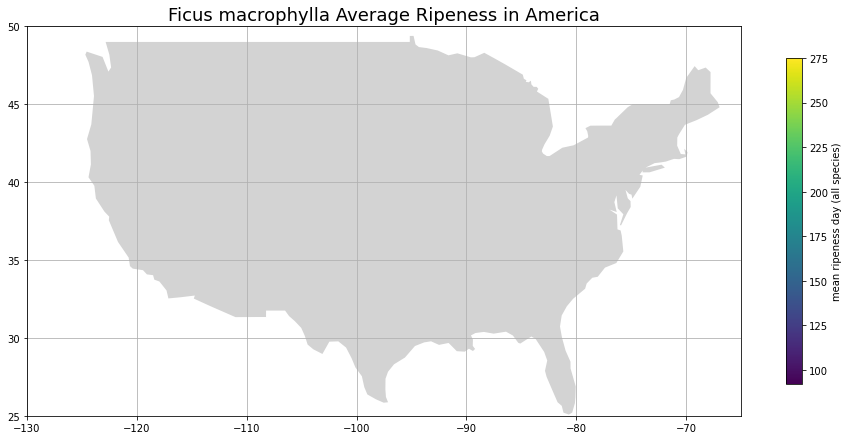

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


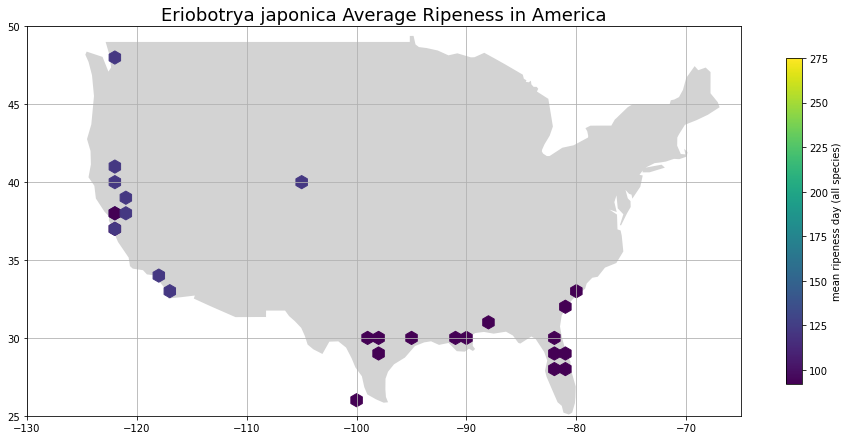

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


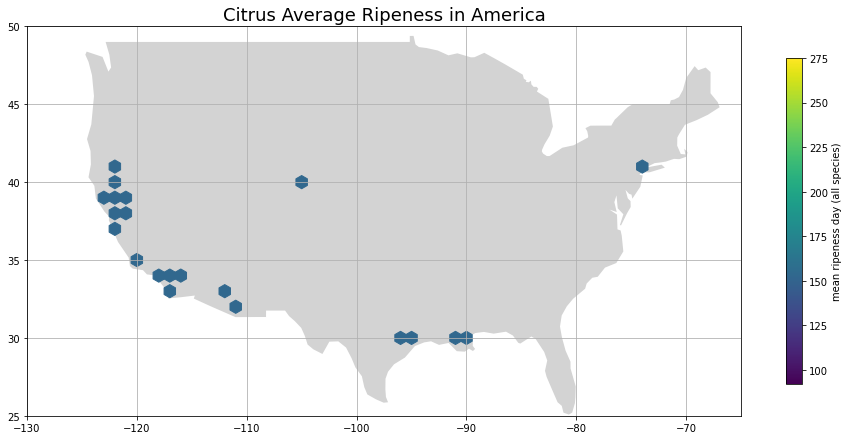

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


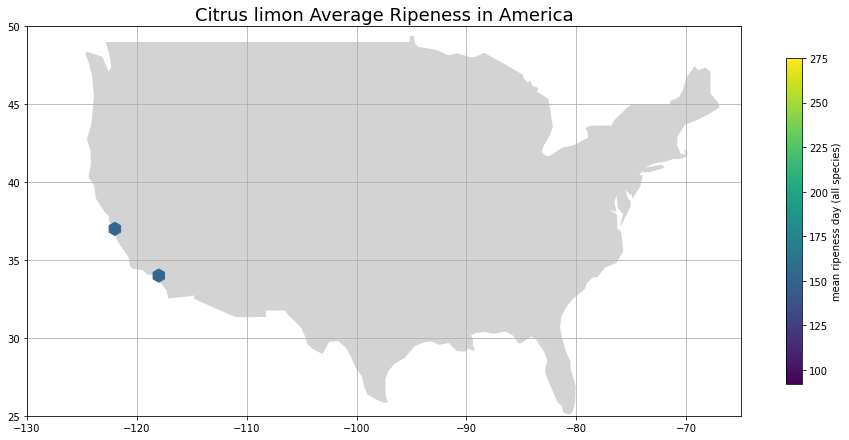

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


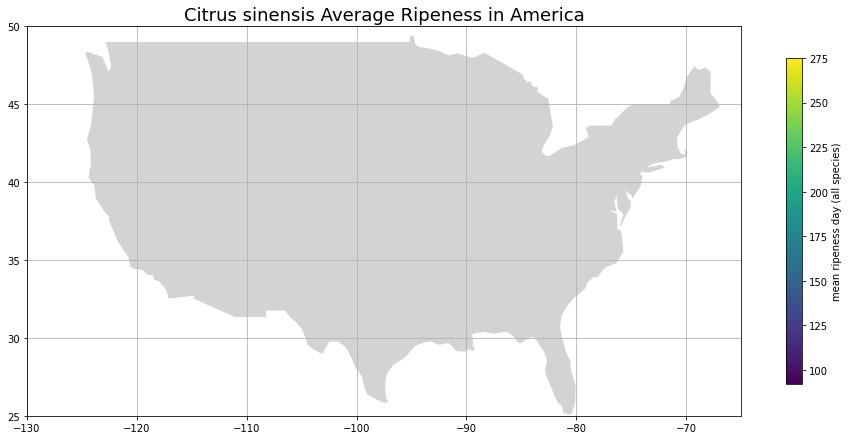

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


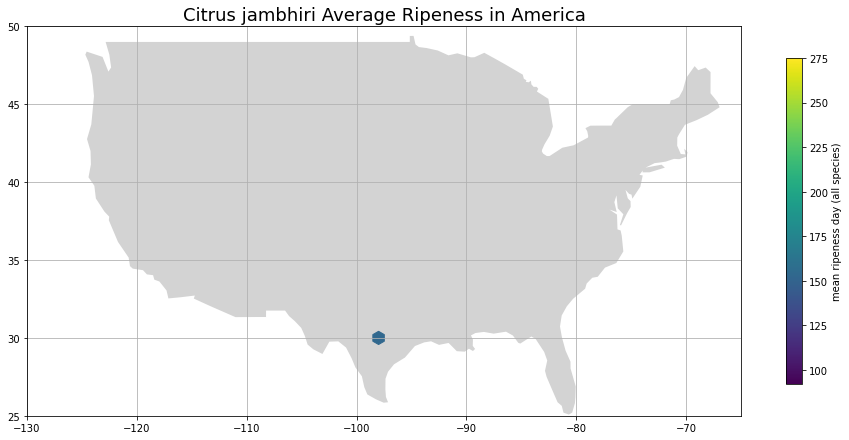

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


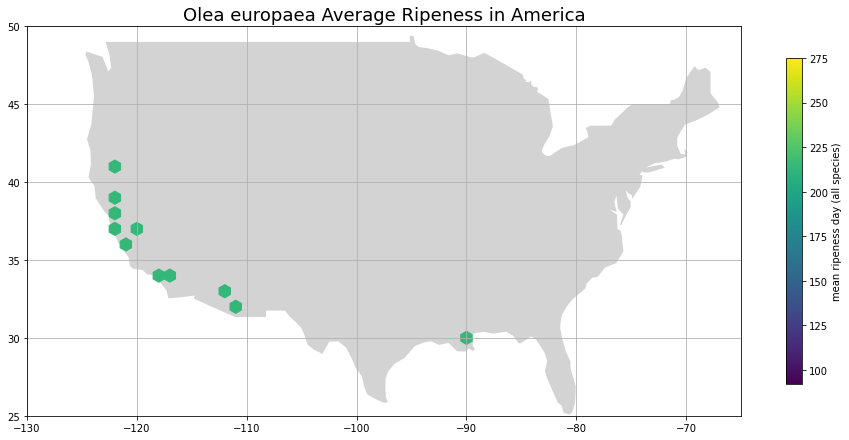

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


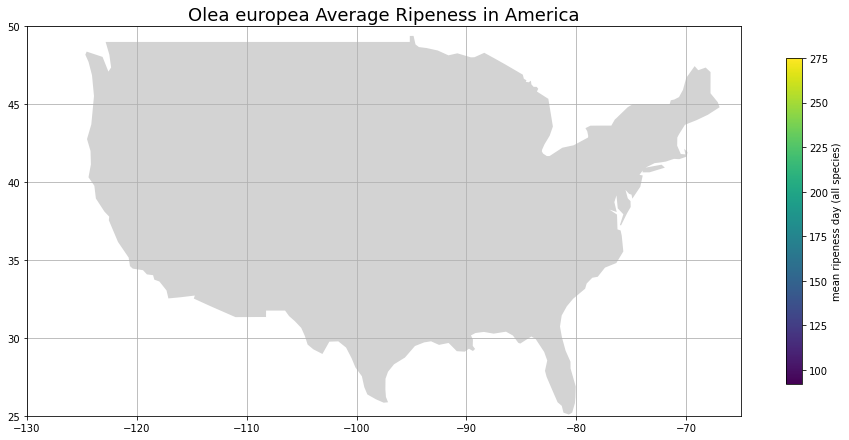

/var/folders/xk/t3y_dz7j75ld1xlbfffyj5lm0000gn/T/ipykernel_41490/1568442524.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


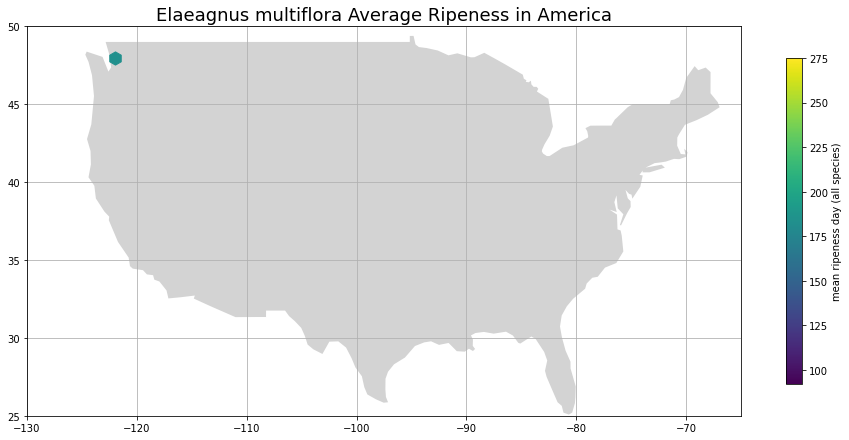

In [200]:
for s in prediction_df['formatted_sci_name'].unique():
    plot_ripeness_america(s, name_type="species")

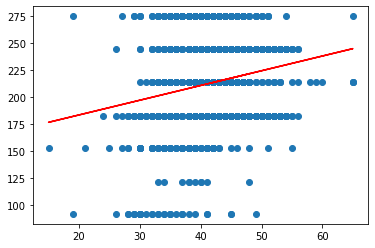

In [155]:
absolute_lat = abs(prediction_df['latitude'])

plt.scatter(absolute_lat, prediction_df['flowering_day'])

m, b = np.polyfit(absolute_lat, prediction_df['flowering_day'], 1)

#add linear regression line to scatterplot 
plt.plot(absolute_lat, m*absolute_lat+b, color="red")

In [159]:
np.corrcoef(absolute_lat, prediction_df['flowering_day'])

array([[1.        , 0.21461665],
       [0.21461665, 1.        ]])

**Harvesting Curves**:

Day 150 - 250?
Normalized - calculate ripeness of a specific day. Probability of it becoming ripe over that time interval. 

Or calculated at every single day of the year. 

Concern: are some species with an STD of zero. Skip normalization if it's equal to zero. 

Try again with Species. 